# Introduction to Diffusion MRI data

_Much of the material in both the current notebook and the upcoming notebooks are adapted from the lessons on [neuroimaging analysis with Python](https://github.com/datacarpentry/python-neuroimaging-lesson)._

## Diffusion Weighted Imaging (DWI)

Diffusion imaging probes the random, microscopic motion of water protons by employing MRI sequences which are sensitive to the geometry and environmental organization surrounding the water protons. This is a popular technique for studying the white matter of the brain. The diffusion within biological structures, such as the brain, are often restricted due to barriers (eg. cell membranes), resulting in a preferred direction of diffusion (anisotropy). A typical diffusion MRI scan will acquire multiple volumes that are sensitive to a particular diffusion direction and result in diffusion-weighted images (DWI). Diffusion that exhibits directionality in the same direction result in an attenuated signal. With further processing (to be discussed later in the lesson), the acquired images can provide measurements which are related to the microscopic changes and estimate white matter trajectories. Images with no diffusion weighting are also acquired as part of the acquisition protocol.

![fiber_configurations](../../../fig/introduction/DiffusionDirections.png) \
Diffusion along X, Y, and Z directions

## b-values & b-vectors

In addition to the acquired diffusion images, two files are collected as part of the diffusion dataset. These files correspond to the gradient amplitude (b-values) and directions (b-vectors) of the diffusion measurement and are named with the extensiosn `.bval` and `.bvec` respectively. The b-value is the diffusion-sensitizing factor, and reflects the timing & strength of the gradients used to acquire the diffusion-weighted images. The b-vector corresponds to the direction of the diffusion sensitivity. Together these two files define the diffusion MRI measurement as a set of gradient directions and corresponding amplitudes.

## Dataset

For the rest of this lesson, we will make use of a subset of a publicly available dataset, ds000221, originally hosted at [openneuro.org](https://openneuro.org/datasets/ds000221/versions/1.0.0). The dataset is structured according to the Brain Imaging Data Structure ([BIDS](https://bids-specification.readthedocs.io/en/etable/)). Please check the [the BIDS-dMRI Setup page](https://carpentries-incubator.github.io/SDC-BIDS-dMRI/setup.html) to download the dataset.

Below is a tree diagram showing the folder structure of a single MR subject and session within ds000221. This was obtained by using the bash command `tree`.

`!tree ../../data/ds000221`

```
../../data/ds000221
├── .bidsignore
├── CHANGES
├── dataset_description.json
├── participants.tsv
├── README
├── derivatives/
├── sub-010001/
└── sub-010002/
    ├── ses-01/
    │    ├── anat
    │    │    ├── sub-010002_ses-01_acq-lowres_FLAIR.json
    │    │    ├── sub-010002_ses-01_acq-lowres_FLAIR.nii.gz
    │    │    ├── sub-010002_ses-01_acq-mp2rage_defacemask.nii.gz
    │    │    ├── sub-010002_ses-01_acq-mp2rage_T1map.nii.gz
    │    │    ├── sub-010002_ses-01_acq-mp2rage_T1w.nii.gz
    │    │    ├── sub-010002_ses-01_inv-1_mp2rage.json
    │    │    ├── sub-010002_ses-01_inv-1_mp2rage.nii.gz
    │    │    ├── sub-010002_ses-01_inv-2_mp2rage.json
    │    │    ├── sub-010002_ses-01_inv-2_mp2rage.nii.gz
    │    │    ├── sub-010002_ses-01_T2w.json
    │    │    └── sub-010002_ses-01_T2w.nii.gz
    │    ├── dwi
    │    │    ├── sub-010002_ses-01_dwi.bval
    │    │    │── sub-010002_ses-01_dwi.bvec
    │    │    │── sub-010002_ses-01_dwi.json
    │    │    └── sub-010002_ses-01_dwi.nii.gz
    │    ├── fmap
    │    │    ├── sub-010002_ses-01_acq-GEfmap_run-01_magnitude1.json
    │    │    ├── sub-010002_ses-01_acq-GEfmap_run-01_magnitude1.nii.gz
    │    │    ├── sub-010002_ses-01_acq-GEfmap_run-01_magnitude2.json
    │    │    ├── sub-010002_ses-01_acq-GEfmap_run-01_magnitude2.nii.gz
    │    │    ├── sub-010002_ses-01_acq-GEfmap_run-01_phasediff.json
    │    │    ├── sub-010002_ses-01_acq-GEfmap_run-01_phasediff.nii.gz
    │    │    ├── sub-010002_ses-01_acq-SEfmapBOLDpost_dir-AP_epi.json
    │    │    ├── sub-010002_ses-01_acq-SEfmapBOLDpost_dir-AP_epi.nii.gz
    │    │    ├── sub-010002_ses-01_acq-SEfmapBOLDpost_dir-PA_epi.json
    │    │    ├── sub-010002_ses-01_acq-SEfmapBOLDpost_dir-PA_epi.nii.gz
    │    │    ├── sub-010002_ses-01_acq-sefmapBOLDpre_dir-AP_epi.json
    │    │    ├── sub-010002_ses-01_acq-sefmapBOLDpre_dir-AP_epi.nii.gz
    │    │    ├── sub-010002_ses-01_acq-sefmapBOLDpre_dir-PA_epi.json
    │    │    ├── sub-010002_ses-01_acq-sefmapBOLDpre_dir-PA_epi.nii.gz
    │    │    ├── sub-010002_ses-01_acq-SEfmapBOLDpost_dir-AP_epi.json
    │    │    ├── sub-010002_ses-01_acq-SEfmapBOLDpost_dir-AP_epi.nii.gz
    │    │    ├── sub-010002_ses-01_acq-SEfmapBOLDpost_dir-PA_epi.json
    │    │    ├── sub-010002_ses-01_acq-SEfmapBOLDpost_dir-PA_epi.nii.gz
    │    │    ├── sub-010002_ses-01_acq-SEfmapDWI_dir-AP_epi.json
    │    │    ├── sub-010002_ses-01_acq-SEfmapDWI_dir-AP_epi.nii.gz
    │    │    ├── sub-010002_ses-01_acq-SEfmapDWI_dir-PA_epi.json
    │    │    └── sub-010002_ses-01_acq-SEfmapDWI_dir-PA_epi.nii.gz
    │    └── func
    │    │    ├── sub-010002_ses-01_task-rest_acq-AP_run-01_bold.json
    │    │    └── sub-010002_ses-01_task-rest_acq-AP_run-01_bold.nii.gz
    └── ses-02/
    ```

## Querying a BIDS Dataset

[`pybids`](https://bids-standard.github.io/pybids/) is a Python API for querying, summarizing and manipulating the BIDS folder structure. We will make use of `pybids` to query the necessary files.

Let's first pull the metadata from its associated JSON file using the `get_metadata()` function for the first run.

In [1]:
import bids
from bids.layout import BIDSLayout

?BIDSLayout

bids.config.set_option('extension_initial_dot', True)

layout = BIDSLayout("../../../data/ds000221", validate=False)

Now that we have a layout object, we can work with a BIDS dataset! Let's extract the metadata from the dataset.

In [2]:
dwi = layout.get(subject='010006', suffix='dwi', extension='nii.gz', return_type='file')[0]
layout.get_metadata(dwi)

{'EchoTime': 0.08,
 'EffectiveEchoSpacing': 0.000390001,
 'FlipAngle': 90,
 'ImageType': ['ORIGINAL', 'PRIMARY', 'DIFFUSION', 'NON'],
 'MagneticFieldStrength': 3,
 'Manufacturer': 'Siemens',
 'ManufacturersModelName': 'Verio',
 'MultibandAccelerationFactor': 2,
 'ParallelAcquisitionTechnique': 'GRAPPA',
 'ParallelReductionFactorInPlane': 2,
 'PartialFourier': '7/8',
 'PhaseEncodingDirection': 'j-',
 'RepetitionTime': 7,
 'TotalReadoutTime': 0.04914}

## Diffusion Imaging in Python ([dipy](https://dipy.org))

For this lesson, we will use the `Dipy` (Diffusion Imaging in Python) package for processing and analysing diffusion MRI.

### Why `dipy`?

- Fully free and open source
- Implemented in Python. Easy to understand, and easy to use.
- Implementations of many state-of-the art algorithms
- High performance. Many algorithms implemented in [`cython`](http://cython.org/)

### Defining a measurement: `GradientTable`

`Dipy` has a built-in function that allows us to read in `bval` and `bvec` files named `read_bvals_bvecs` under the `dipy.io.gradients` module. Let's first grab the path to our gradient directions and amplitude files and load them into memory.

In [3]:
bvec = layout.get_bvec(dwi)
bval = layout.get_bval(dwi)

Now that we have the necessary diffusion files, let's explore the data!

In [4]:
import numpy as np
import nibabel as nib

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

data = nib.load(dwi).get_fdata()
data.shape

(128, 128, 88, 67)

We can see that the data is 4 dimensional. The 4th dimension represents the different diffusion directions we are sensitive to. Next, let's take a look at a slice.

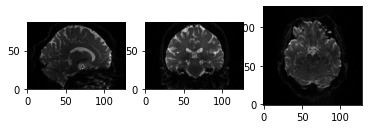

In [5]:
x_slice = data[58, :, :, 0]
y_slice = data[:, 58, :, 0]
z_slice = data[:, :, 30, 0]

slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

We can also see how the diffusion gradients are represented. This is plotted on a sphere, the further away from the center of the sphere, the stronger the diffusion gradient (increased sensitivity to diffusion).

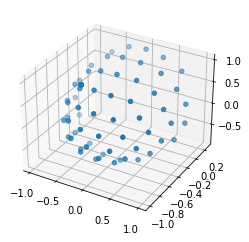

In [6]:
bvec_txt = np.genfromtxt(bvec)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bvec_txt[0], bvec_txt[1], bvec_txt[2])

plt.show()

The files associated with the diffusion gradients need to converted to a `GradientTable` object to be used with `Dipy`. A `GradientTable` object can be implemented using the `dipy.core.gradients` module. The input to the `GradientTable` should be our the values for our gradient directions and amplitudes we read in.

In [7]:
from dipy.io.gradients import read_bvals_bvecs
from dipy.core.gradients import gradient_table

gt_bvals, gt_bvecs = read_bvals_bvecs(bval, bvec)
gtab = gradient_table(gt_bvals, gt_bvecs)

We will need this gradient table later on to process our data and generate diffusion tensor images (DTI)!

There is also a built in function for gradient tables, `b0s_mask` that can be used to separate difussion weighted measurements from non-diffusion weighted measurements (b=0s/mm^2). Try to extract the vector corresponding to diffusion weighted measurements in the following cell!

In [8]:
gtab.bvecs[~gtab.b0s_mask]

array([[-2.51881e-02, -3.72268e-01,  9.27783e-01],
       [ 9.91276e-01, -1.05773e-01, -7.86433e-02],
       [-1.71007e-01, -5.00324e-01, -8.48783e-01],
       [-3.28334e-01, -8.07475e-01,  4.90083e-01],
       [ 1.59023e-01, -5.08209e-01, -8.46425e-01],
       [ 4.19677e-01, -5.94275e-01,  6.86082e-01],
       [-8.76364e-01, -4.64096e-01,  1.28844e-01],
       [ 1.47409e-01, -8.01322e-02,  9.85824e-01],
       [ 3.50020e-01, -9.29191e-01, -1.18704e-01],
       [ 6.70475e-01,  1.96486e-01,  7.15441e-01],
       [-6.85569e-01,  2.47048e-01,  6.84808e-01],
       [ 3.21619e-01, -8.24329e-01,  4.65879e-01],
       [-8.35634e-01, -5.07463e-01, -2.10233e-01],
       [ 5.08740e-01, -8.43979e-01,  1.69950e-01],
       [-8.03836e-01, -3.83790e-01,  4.54481e-01],
       [-6.82578e-02, -7.53445e-01, -6.53959e-01],
       [-2.07898e-01, -6.27330e-01,  7.50490e-01],
       [ 9.31645e-01, -3.38939e-01,  1.30988e-01],
       [-2.04382e-01, -5.95385e-02,  9.77079e-01],
       [-3.52674e-01, -9.31125e

It is also important to know where our diffusion weighting free measurements are as we need them for registration in our preprocessing, (our next notebook). The `b0s_mask` shows that this is the first volume of our dataset.

In [9]:
gtab.b0s_mask

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True])

In the next few notebooks, we will talk more about preprocessing the diffusion weighted images and reconstructing the Tensor model

## Exercise 1

Get a list of **all** diffusion data in NIfTI file format

## Solution

In [10]:
dwi_data = layout.get(suffix='dwi', extension='nii.gz', return_type='file')